<a href="https://colab.research.google.com/github/armandoordonez/deeplearning/blob/main/Happy_HP_tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Expressions Analysis With Logistic Regression and Neural Network

---


Duvan Ricardo Cuero Colorado

Alejandra Diaz Parra


---



In this notebook it is shown how to use a single layer neural network logic with logistic regression to classify facial expressions as happy or not happy.

Importing necessary libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

%matplotlib inline

The datasets will be loaded from a train and a test h5 files, as shown below.

In [ ]:

def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

The x's datasets contain the pictures, where each pixel is represented by a vector of three numbers ranging from 0 to 255, corresponding to the red, green and blue channels (RGB).

In [ ]:
train_set_x_orig

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

The y datasets contain the classification of the photo as a person with a happy ot not happy expression. In this, the happy faces are marked with a 1, and and the not happy faces are marked with a 0.

In [ ]:
classes

array([0, 1])

In [ ]:
train_set_y

array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 

Below it is shown the example of a picture from the train dataset.

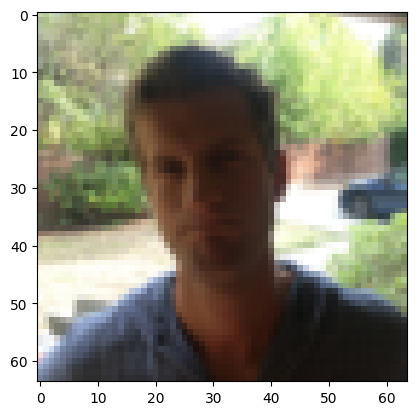

In [ ]:
index =10
plt.imshow(train_set_x_orig[index])


The code below shows the dimensions of the datasets and the images.

In [ ]:
m_train = train_set_x_orig.shape[0]
m_test =  test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 600
Number of testing examples: m_test = 150
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (600, 64, 64, 3)
train_set_y shape: (1, 600)
test_set_x shape: (150, 64, 64, 3)
test_set_y shape: (1, 150)


Makes the images unidimensional so that they can be processed by the model:

In [ ]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], train_set_x_orig.shape[1] * train_set_x_orig.shape[2] * train_set_x_orig.shape[3])
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], test_set_x_orig.shape[1] * test_set_x_orig.shape[2] * test_set_x_orig.shape[3])

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (600, 12288)
train_set_y shape: (1, 600)
test_set_x_flatten shape: (150, 12288)
test_set_y shape: (1, 150)
sanity check after reshaping: [178 193  82 188 207]


To center and standardize the dataset, every row of the dataset is divided by 255 (the maximum value of a pixel channel).

In [ ]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [ ]:
type(train_set_x)

numpy.ndarray

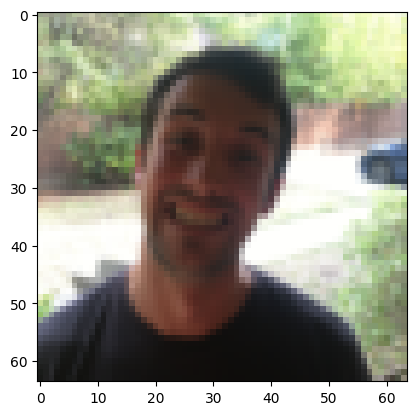

In [ ]:
plt.imshow(train_set_x_orig[5])

Now we are gonna use the Sequential model from Keras to create a neural network.
The shape of the input for the first layer is going to be 64x64x3 because the pictures are of 64x64 size, and they're represented by RGB pixels which have 3 dimensions (red, green and blue).
The last layer is going to be of size 1, because there's only one possible output for an image: its classification as a picture that contains a happy (1) or non happy (0) expression.

In [ ]:
# find best hyperparameters using grid search
from sklearn.model_selection import GridSearchCV
import keras
keras.__version__
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(64 * 64 * 3,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   # 1 salida: es una expresion feliz o no
model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 16)                196624    
                                                                 
 dense_52 (Dense)            (None, 16)                272       
                                                                 
 dense_53 (Dense)            (None, 1)                 17        
                                                                 
Total params: 196913 (769.19 KB)
Trainable params: 196913 (769.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
original_hist = model.fit(train_set_x, train_set_y[0],
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_set_x, test_set_y[0]))

Epoch 1/20
2/2 [==============================] - 57s 261ms/step - loss: 0.9999 - acc: 0.5067 - val_loss: 0.6736 - val_acc: 0.5533
Epoch 2/20
2/2 [==============================] - 0s 68ms/step - loss: 0.7859 - acc: 0.4867 - val_loss: 1.3352 - val_acc: 0.4400
Epoch 3/20
2/2 [==============================] - 0s 68ms/step - loss: 1.1964 - acc: 0.5000 - val_loss: 1.0489 - val_acc: 0.4400
Epoch 4/20
2/2 [==============================] - 0s 61ms/step - loss: 0.9383 - acc: 0.5000 - val_loss: 0.7667 - val_acc: 0.4400
Epoch 5/20
2/2 [==============================] - 0s 61ms/step - loss: 0.7229 - acc: 0.5000 - val_loss: 0.6927 - val_acc: 0.5600
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6926 - val_acc: 0.5600
Epoch 7/20
2/2 [==============================] - 0s 111ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6925 - val_acc: 0.5600
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.6932 - acc: 0.5000 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_set_x, test_set_y[0])
print('test_acc:', test_acc)

5/5 [==============================] - 0s 3ms/step - loss: 0.6924 - acc: 0.5600
test_acc: 0.5600000023841858


In [ ]:
import keras
keras.__version__
from keras import models
from keras import layers

In [ ]:

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Dense, Embedding, LSTM, Dropout, Activation, Flatten, Input, SimpleRNN
from keras.callbacks import EarlyStopping

Run the following command to install the module scikeras:

In [ ]:
!pip install scikeras

Now we're going to use grid search to find best hyperparameters for the neural network model.

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='rmsprop', loss='binary_crossentropy'):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(64 * 64 * 3,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer,  loss="binary_crossentropy", metrics=['acc'])

    return model

model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
param_grid = {'batch_size': [16,32, 64, 128],
                'epochs': [10, 15, 20,25,30],
                'optimizer': ['adam', 'rmsprop']}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_set_x, train_set_y[0])

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Printing the metrics for the model:

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.895000 using {'batch_size': 16, 'epochs': 30, 'optimizer': 'rmsprop'}
0.500000 (0.000000) with: {'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}
0.628333 (0.098686) with: {'batch_size': 16, 'epochs': 10, 'optimizer': 'rmsprop'}
0.583333 (0.117851) with: {'batch_size': 16, 'epochs': 15, 'optimizer': 'adam'}
0.648333 (0.114915) with: {'batch_size': 16, 'epochs': 15, 'optimizer': 'rmsprop'}
0.671667 (0.122225) with: {'batch_size': 16, 'epochs': 20, 'optimizer': 'adam'}
0.553333 (0.075425) with: {'batch_size': 16, 'epochs': 20, 'optimizer': 'rmsprop'}
0.701667 (0.152880) with: {'batch_size': 16, 'epochs': 25, 'optimizer': 'adam'}
0.640000 (0.197990) with: {'batch_size': 16, 'epochs': 25, 'optimizer': 'rmsprop'}
0.780000 (0.126557) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'adam'}
0.895000 (0.038944) with: {'batch_size': 16, 'epochs': 30, 'optimizer': 'rmsprop'}
0.590000 (0.081343) with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'adam'}
0.496667 (0.142906) with: {

In [ ]:
# print metrics using best hyperparameters
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(64 * 64 * 3,)))     ##El input es 64*64*3 debido a que las imágenes son de tamaño 64*64 y están en formato RGB.
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   # 1 salida: es una expresion feliz o no
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', 'Precision', 'Recall', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])
model.summary()

model.fit(train_set_x, train_set_y[0], batch_size=16, epochs=30) #, validation_split=0.2)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                196624    
                                                                 
 dense_58 (Dense)            (None, 16)                272       
                                                                 
 dense_59 (Dense)            (None, 1)                 17        
                                                                 
Total params: 196913 (769.19 KB)
Trainable params: 196913 (769.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
38/38 [==============================] - 2s 10ms/step - loss: 0.7788 - acc: 0.5500
Epoch 2/30
38/38 [==============================] - 0s 10ms/step - loss: 0.5548 - acc: 0.6950
Epoch 3/30
38/38 [==============================] - 0s 4ms/step - loss: 0.4600 - acc: 0.7

Evaluating the model in the test dataset:

In [ ]:

test_loss, test_acc = model.evaluate(test_set_x, test_set_y[0])
print('test_acc:', test_acc)


5/5 [==============================] - 0s 9ms/step - loss: 0.1237 - acc: 0.9533
test_acc: 0.95333331823349


Now we're gonna calculate the best learning rate and momentum for the model:

In [ ]:
model = KerasClassifier(model=create_model, loss="binary_crossentropy", optimizer="Adam", epochs=30, batch_size=16, verbose=0)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_set_x, train_set_y[0])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.916667 using {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.9}
0.646667 (0.207418) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.0}
0.596667 (0.136707) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.2}
0.886667 (0.055126) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.4}
0.781667 (0.199680) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.6}
0.643333 (0.202704) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.8}
0.916667 (0.023570) with: {'optimizer__learning_rate': 0.001, 'optimizer__momentum': 0.9}
0.678333 (0.133187) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.0}
0.841667 (0.061283) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.2}
0.910000 (0.030822) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.4}
0.810000 (0.089815) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.6}
0.760000 (0.184029)

In [ ]:

# print metrics using best hyperparameters
model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(64 * 64 * 3,)))     ##El input es 64*64*3 debido a que las imágenes son de tamaño 64*64 y están en formato RGB.
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))   # 1 salida: es una expresion feliz o no
optimizer = keras.optimizers.Adam(learning_rate=0.001,ema_momentum=0.9)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc'])

model.summary()

model.fit(train_set_x, train_set_y[0], batch_size=16, epochs=30) #, validation_split=0.2)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 16)                196624    
                                                                 
 dense_64 (Dense)            (None, 16)                272       
                                                                 
 dense_65 (Dense)            (None, 1)                 17        
                                                                 
Total params: 196913 (769.19 KB)
Trainable params: 196913 (769.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
38/38 [==============================] - 2s 4ms/step - loss: 2.0595 - acc: 0.5517
Epoch 2/30
38/38 [==============================] - 0s 4ms/step - loss: 0.7223 - acc: 0.6267
Epoch 3/30
38/38 [==============================] - 0s 4ms/step - loss: 0.4614 - acc: 0.775

In [ ]:
test_loss, test_acc = model.evaluate(test_set_x, test_set_y[0])
print('test_acc:', test_acc)

5/5 [==============================] - 0s 7ms/step - loss: 0.1905 - acc: 0.9200
test_acc: 0.9200000166893005


Calculating the bias, variance and overfitting for the train and the test set:

In [ ]:
import sklearn.metrics as metrics

y_pred_train = model.predict(train_set_x)
y_true_train = train_set_y[0]

bias_train = metrics.mean_squared_error(y_true_train, y_pred_train)
variance_train = np.var(y_pred_train)
overfitting_train = bias_train + variance_train

y_pred_test = model.predict(test_set_x)
y_true_test = test_set_y[0]

bias_test = metrics.mean_squared_error(y_true_test, y_pred_test)
variance_test = np.var(y_pred_test)
overfitting_test = bias_test + variance_test

# Print the results
print("Train bias:", bias_train)
print("Train variance:", variance_train)
print("Train overfitting:", overfitting_train)

print("Test bias:", bias_test)
print("Test variance:", variance_test)
print("Test overfitting:", overfitting_test)


5/5 [==============================] - 0s 3ms/step
Train bias: 0.0269389370711917
Train variance: 0.21123534
Train overfitting: 0.23817428148113434
Test bias: 0.05905292188558294
Test variance: 0.19085905
Test overfitting: 0.24991197144422247


The results show that the bias for the train and the test set are very low.

In [ ]:
def create_model(init_mode='uniform'):
  model = Sequential()
  model.add(layers.Dense(16,kernel_initializer=init_mode,activation='relu', input_shape=(64 * 64 * 3,)))     ##El input es 64*64*3 debido a que las imágenes son de tamaño 64*64 y están en formato RGB.
  model.add(layers.Dense(16,kernel_initializer=init_mode, activation='relu'))
  model.add(layers.Dense(1,kernel_initializer=init_mode,activation='sigmoid'))   # 1 salida: es una expresion feliz o no
  optimizer = keras.optimizers.Adam(learning_rate=0.01,ema_momentum=0.4)
  model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc'])
  return model

# create model
model = KerasClassifier(model=create_model, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(model__init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_set_x, train_set_y[0])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best: 0.655000 using {'model__init_mode': 'glorot_normal'}
0.500000 (0.000000) with: {'model__init_mode': 'uniform'}
0.500000 (0.000000) with: {'model__init_mode': 'lecun_uniform'}
0.500000 (0.000000) with: {'model__init_mode': 'normal'}
0.500000 (0.000000) with: {'model__init_mode': 'zero'}
0.655000 (0.219203) with: {'model__init_mode': 'glorot_normal'}
0.500000 (0.000000) with: {'model__init_mode': 'glorot_uniform'}
0.500000 (0.000000) with: {'model__init_mode': 'he_normal'}
0.655000 (0.219203) with: {'model__init_mode': 'he_uniform'}


In [ ]:
model = Sequential()
model.add(layers.Dense(16,kernel_initializer='glorot_normal', activation='relu', input_shape=(64 * 64 * 3,)))     ##El input es 64*64*3 debido a que las imágenes son de tamaño 64*64 y están en formato RGB.
model.add(layers.Dense(16, kernel_initializer='glorot_normal',activation='relu'))
model.add(layers.Dense(1,kernel_initializer='glorot_normal', activation='sigmoid'))   # 1 salida: es una expresion feliz o no
optimizer = keras.optimizers.Adam(learning_rate=0.001,ema_momentum=0.9)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc'])

model.summary()

model.fit(train_set_x, train_set_y[0], batch_size=16, epochs=30) #, validation_split=0.2)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 16)                196624    
                                                                 
 dense_88 (Dense)            (None, 16)                272       
                                                                 
 dense_89 (Dense)            (None, 1)                 17        
                                                                 
Total params: 196913 (769.19 KB)
Trainable params: 196913 (769.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
38/38 [==============================] - 1s 7ms/step - loss: 0.7064 - acc: 0.5817
Epoch 2/30
38/38 [==============================] - 0s 7ms/step - loss: 0.6673 - acc: 0.5817
Epoch 3/30
38/38 [==============================] - 0s 7ms/step - loss: 0.5210 - acc: 0.725

In [ ]:
test_loss, test_acc = model.evaluate(test_set_x, test_set_y[0])
print('test_acc:', test_acc)

5/5 [==============================] - 0s 3ms/step - loss: 0.1458 - acc: 0.9533
test_acc: 0.95333331823349


In [ ]:
# Function to create model, required for KerasClassifier
def create_model(activation='relu'):
  model = Sequential()
  model.add(layers.Dense(16,kernel_initializer='glorot_normal', activation=activation, input_shape=(64 * 64 * 3,)))     ##El input es 64*64*3 debido a que las imágenes son de tamaño 64*64 y están en formato RGB.
  model.add(layers.Dense(16, kernel_initializer='glorot_normal',activation=activation))
  model.add(layers.Dense(1,kernel_initializer='glorot_normal', activation='sigmoid'))   # 1 salida: es una expresion feliz o no
  optimizer = keras.optimizers.Adam(learning_rate=0.001,ema_momentum=0.9)
  model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc'])
  return model

# create model
model = KerasClassifier(model=create_model, epochs=30, batch_size=16, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(model__activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_set_x, train_set_y[0])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best: 0.936667 using {'model__activation': 'linear'}
0.500000 (0.000000) with: {'model__activation': 'softmax'}
0.930000 (0.035590) with: {'model__activation': 'softplus'}
0.500000 (0.000000) with: {'model__activation': 'softsign'}
0.901667 (0.020548) with: {'model__activation': 'relu'}
0.500000 (0.000000) with: {'model__activation': 'tanh'}
0.500000 (0.000000) with: {'model__activation': 'sigmoid'}
0.500000 (0.000000) with: {'model__activation': 'hard_sigmoid'}
0.936667 (0.036591) with: {'model__activation': 'linear'}


In [ ]:
from keras.constraints import MaxNorm

# Function to create model, required for KerasClassifier
def create_model(dropout_rate, weight_constraint):
  model = Sequential()
  model.add(layers.Dense(16,kernel_initializer='glorot_normal', activation='linear', kernel_constraint=MaxNorm(weight_constraint),input_shape=(64 * 64 * 3,)))     ##El input es 64*64*3 debido a que las imágenes son de tamaño 64*64 y están en formato RGB.
  model.add(Dropout(dropout_rate))
  model.add(layers.Dense(16, kernel_initializer='glorot_normal',activation='linear'))
  model.add(Dropout(dropout_rate))
  model.add(layers.Dense(1,kernel_initializer='glorot_normal', activation='sigmoid'))   # 1 salida: es una expresion feliz o no
  optimizer = keras.optimizers.Adam(learning_rate=0.001,ema_momentum=0.9)
  model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc'])
  return model

# create model
model = KerasClassifier(model=create_model, epochs=30, batch_size=16, verbose=0)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
#param_grid = dict(model__dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_set_x, train_set_y[0])
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best: 0.950000 using {'model__dropout_rate': 0.3, 'model__weight_constraint': 4.0}
0.918333 (0.045522) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 1.0}
0.941667 (0.015456) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 2.0}
0.945000 (0.021213) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 3.0}
0.931667 (0.043653) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 4.0}
0.946667 (0.025927) with: {'model__dropout_rate': 0.0, 'model__weight_constraint': 5.0}
0.868333 (0.088726) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 1.0}
0.898333 (0.044783) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 2.0}
0.900000 (0.064161) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 3.0}
0.898333 (0.042492) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 4.0}
0.916667 (0.054365) with: {'model__dropout_rate': 0.1, 'model__weight_constraint': 5.0}
0.861667 (0.034721) with: {'model__dr

In [ ]:
model = Sequential()
model.add(layers.Dense(16,kernel_initializer='glorot_normal', activation='relu',kernel_constraint=4.0, input_shape=(64 * 64 * 3,)))     ##El input es 64*64*3 debido a que las imágenes son de tamaño 64*64 y están en formato RGB.
model.add(Dropout(0.3))
model.add(layers.Dense(16, kernel_initializer='glorot_normal',activation='relu',kernel_constraint=3.0))
model.add(Dropout(0.2))
model.add(layers.Dense(1,kernel_initializer='glorot_normal', activation='sigmoid'))   # 1 salida: es una expresion feliz o no
optimizer = keras.optimizers.Adam(learning_rate=0.001,ema_momentum=0.9)
model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['acc'])

model.summary()

model.fit(train_set_x, train_set_y[0], batch_size=16, epochs=30) #, validation_split=0.2)

ValueError: Could not interpret constraint function identifier: 4.0

In [ ]:
test_loss, test_acc = model.evaluate(test_set_x, test_set_y[0])
print('test_acc:', test_acc)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
import sklearn.metrics as metrics

y_pred_train = model.predict(train_set_x)
y_true_train = train_set_y[0]

bias_train = metrics.mean_squared_error(y_true_train, y_pred_train)
variance_train = np.var(y_pred_train)
overfitting_train = bias_train + variance_train

y_pred_test = model.predict(test_set_x)
y_true_test = test_set_y[0]

bias_test = metrics.mean_squared_error(y_true_test, y_pred_test)
variance_test = np.var(y_pred_test)
overfitting_test = bias_test + variance_test

# Print the results
print("Train bias:", bias_train)
print("Train variance:", variance_train)
print("Train overfitting:", overfitting_train)

print("Test bias:", bias_test)
print("Test variance:", variance_test)
print("Test overfitting:", overfitting_test)

19/19 [==============================] - 0s 2ms/step


ValueError: y_true and y_pred have different number of output (1!=12288)